This project was completed as a part of George Washington University's Data Analytics and Visualization course. Based on the criteria below, I generated random combinations of latitude and longitude pairs and passed them to CityPy to generate a random list of cities. I then passed those cities to the OpenWeatherMap API to retrieve weather information about each city. Analysis was done using Pandas and NumPy, visualizations built using Matplotlib. The results of this analysis (for different dates) are currrently hosted at dylhowe.github.io

## WeatherPy

#### In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

In [24]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json

# Import API key
from api_keys import api_key

# Use Citypy to map lat-lng pairs to the closest cities
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# generate a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

# Create an empty dataframe to hold city data
summary_df = pd.DataFrame({"City": cities,
                         "Lat": "",
                          "Temperature": "",
                          "Humidity": "",
                          "Cloudiness": "",
                          "Wind Speed": ""
                          })


584


## Perform API Calls

In [29]:
# OpenWeatherMap Settings
settings = {"units": "imperial", "appid": api_key}

#loop through city names and record weather data
for index, row in summary_df.iterrows():
  
    try:
        current_city = summary_df["City"]
    
    
        response = owm.get_current(current_city[index], **settings)
        
        #save city data to temporary variables
        Lat = response["coord"]["lat"]
        Cloudiness = response["clouds"]["all"]
        Humidity = response["main"]["humidity"]
        Temperature = response["main"]["temp_max"]
        Wind_Speed = response["wind"]["speed"]
        
        #write city data into dataframe
        summary_df.at[index, "Lat"] = Lat
        summary_df.at[index, "Cloudiness"] = Cloudiness
        summary_df.at[index, "Humidity"] = Humidity
        summary_df.at[index, "Temperature"] = Temperature
        summary_df.at[index, "Wind Speed"] = Wind_Speed
        
    except:
        summary_df.drop(labels=index,inplace=True)  
        
summary_df.head()

,City,Cloudiness,Humidity,Lat,Temperature,Wind Speed
0,rikitea,64,100,-23.12,79.94,10.67
1,nassjo,88,92,57.65,32,5.82
3,tecoanapa,90,70,16.99,84.2,4.7
4,vilhena,0,83,-12.74,77,10.29
5,yellowknife,75,76,62.45,-11.21,16.11


In [12]:
summary_df.to_csv("output.csv")

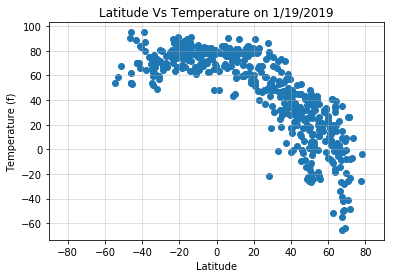

In [25]:
tempplot = plt.scatter(summary_df["Lat"], summary_df["Temperature"])
plt.title("Latitude Vs Temperature on 1/19/2019")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.savefig("temperature.png")
plt.show()


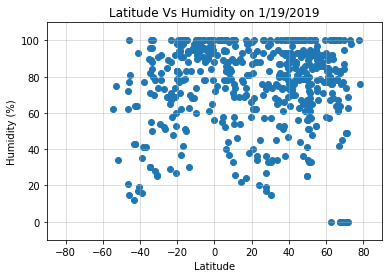

In [26]:
humidityplot = plt.scatter(summary_df["Lat"], summary_df["Humidity"])
plt.title("Latitude Vs Humidity on 1/19/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.savefig("humidity.png")
plt.show()


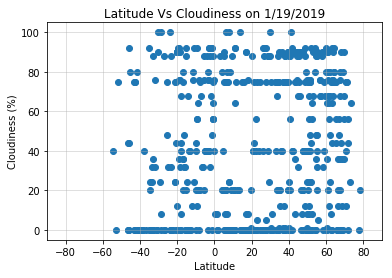

In [27]:
cloudyplot = plt.scatter(summary_df["Lat"], summary_df["Cloudiness"])
plt.title("Latitude Vs Cloudiness on 1/19/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.savefig("cloudiness.png")
plt.show()


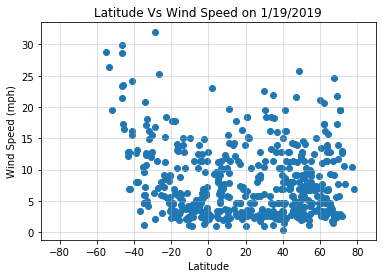

In [28]:
windyplot = plt.scatter(summary_df["Lat"], summary_df["Wind Speed"])
plt.title("Latitude Vs Wind Speed on 1/19/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=.5)
plt.xlim(-90,90)
plt.savefig("windspeed.png")
plt.show()
